<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма:
strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

Strategy - Стратегия или вид дифференциальной эволюции. Должен быть одним из:'Best1bin','Best1exp','Rand1exp','Randtobest1exp','Currenttobest1exp','Best2exp','Rand2exp','Randtobest1bin','Currenttobest1bin','Best2bin','Rand2bin','Rand1bin'

Maxiter - количество поколений (эпох)

Popsize - коэффициент или множитель определяющий общий размер выборки или популяции данных

Tol - относительная терпимость к конвергенции

Mutation - уровень мутации (диффернциальный вес) выбокри данных, задаются границы

Recombination - вероятность кроссовера, увеличение этого значения позволяет большему количеству мутантов прогрессировать в следующее поколение, но с риском для стабильности популяции.

Updating - принимет два вида deffered или imediate, если 'immediate'лучший вектор решения постоянно обновляется в течение одного поколения, при 'deferred'этом вектор наилучшего решения обновляется один раз за поколение.

In [0]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import decimal

In [0]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds,  seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [42]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, popsize=5, maxiter=20, mutation=(0.1, 0.1), recombination=1, strategy='best1bin', tol=0.3, updating='immediate', seed=42)
result

     fun: 3.5744518772674607
     jac: array([-2.73558953e-05,  1.49213975e-05])
 message: 'Optimization terminated successfully.'
    nfev: 44
     nit: 1
 success: True
       x: array([-0.9684782 ,  0.96847797])

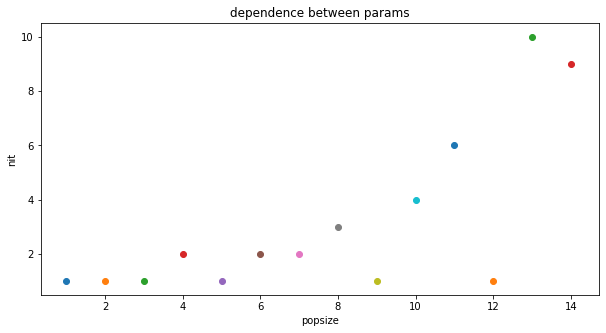

In [22]:
def ackley(x):

  arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
  arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
  return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
 
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, popsize=5, maxiter=20, mutation=(0.1, 0.1), recombination=1, strategy='best1bin', tol=0.3, updating='immediate', seed=42)

plt.figure(figsize=(10,5)) 
plt.xlabel('popsize')
plt.ylabel('nit')
plt.title('dependence between params')

for i in range(1,15):

  result = differential_evolution(ackley, bounds, popsize=i, maxiter=20, mutation=(0.1, 0.1), recombination=1, strategy='best1bin', tol=0.3, updating='immediate', seed=42)
  plt.scatter(i, result.nit)

plt.show()

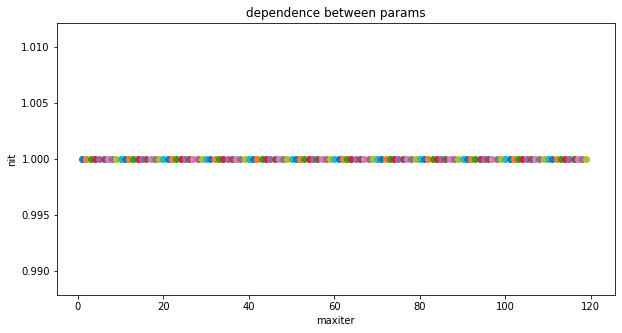

In [47]:
plt.figure(figsize=(10,5)) 
plt.xlabel('maxiter')
plt.ylabel('nit')
plt.title('dependence between params')

for i in range(1,120):

  result = differential_evolution(ackley, bounds, popsize=5, maxiter=i, mutation=(0.1, 0.1), recombination=1, strategy='best1bin', tol=0.3, updating='immediate', seed=42)
  plt.scatter(i, result.nit)

plt.show()

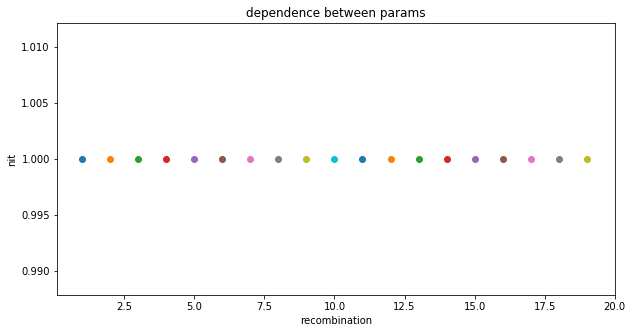

In [34]:
plt.figure(figsize=(10,5)) 
plt.xlabel('recombination')
plt.ylabel('nit')
plt.title('dependence between params')

for i in range(1,20):

  result = differential_evolution(ackley, bounds, popsize=5, maxiter=20, mutation=(0.1, 1), recombination=i, strategy='best1bin', tol=0.3, updating='immediate', seed=42)
  plt.scatter(i, result.nit)

plt.show()

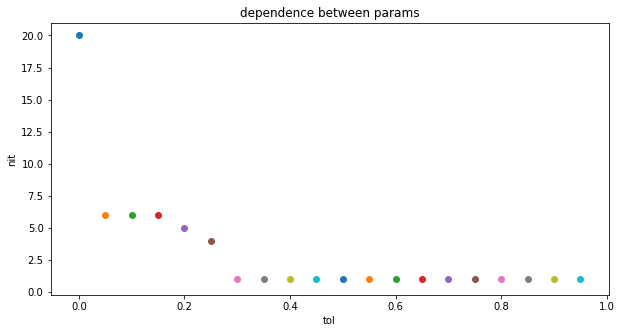

In [66]:
def drange(x, y, jump):
  while x < y:
    yield float(x)
    x += decimal.Decimal(jump)

plt.figure(figsize=(10,5)) 
plt.xlabel('tol')
plt.ylabel('nit')
plt.title('dependence between params')

for i in list(drange(0, 1, decimal.Decimal('0.05'))):

  result = differential_evolution(ackley, bounds, popsize=5, maxiter=20, mutation=(0.1, 1), recombination=1, strategy='best1bin', tol=i, updating='immediate', seed=42)
  plt.scatter(i, result.nit)

plt.show()

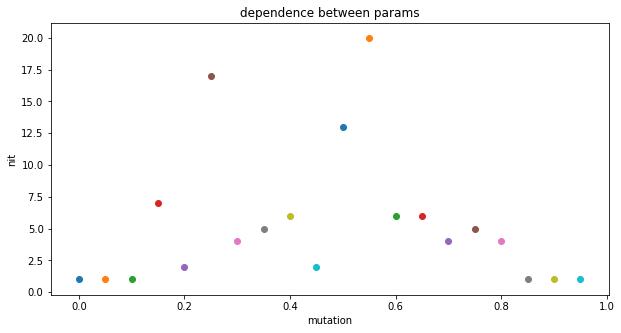

In [70]:
def drange(x, y, jump):
  while x < y:
    yield float(x)
    x += decimal.Decimal(jump)

plt.figure(figsize=(10,5)) 
plt.xlabel('mutation')
plt.ylabel('nit')
plt.title('dependence between params')

for i in list(drange(0, 1, decimal.Decimal('0.05'))):

  result = differential_evolution(ackley, bounds, popsize=5, maxiter=20, mutation=(i, 1), recombination=1, strategy='best1bin', tol=0.3, updating='immediate', seed=42)
  plt.scatter(i, result.nit)

plt.show()

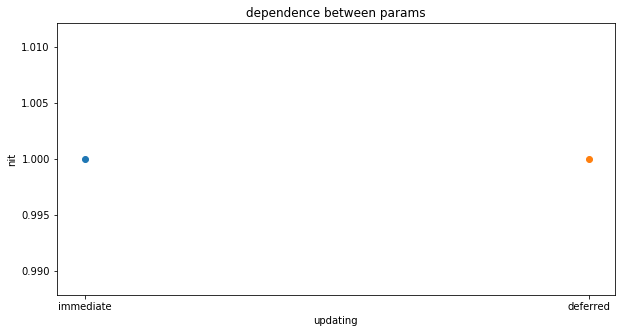

In [75]:
plt.figure(figsize=(10,5)) 
plt.xlabel('updating')
plt.ylabel('nit')
plt.title('dependence between params')

updating = ('immediate', 'deferred')

for i in updating:

  result = differential_evolution(ackley, bounds, popsize=5, maxiter=20, mutation=(0.1, 1), recombination=1, strategy='best1bin', tol=0.3, updating=i, seed=42)
  plt.scatter(i, result.nit)

plt.show()

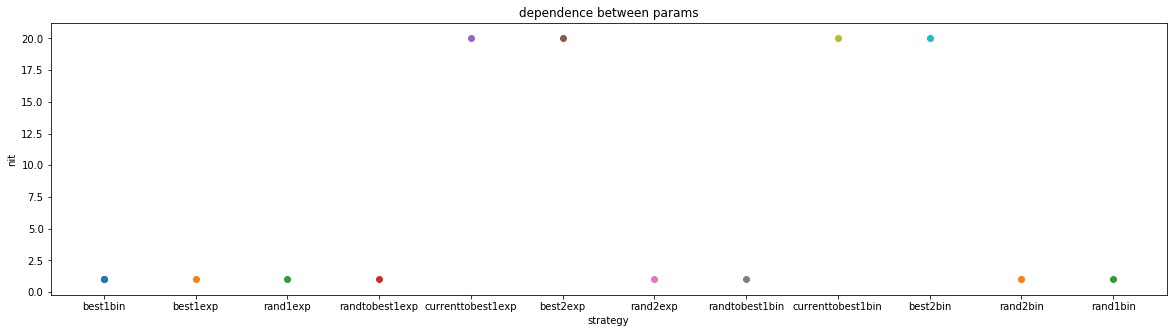

In [76]:
plt.figure(figsize=(20,5)) 
plt.xlabel('strategy')
plt.ylabel('nit')
plt.title('dependence between params')

strategy = ('best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 
              'best2bin', 'best1bin', 'rand2bin', 'rand1bin')

for i in strategy:
  
  result = differential_evolution(ackley, bounds, popsize=5, maxiter=20, mutation=(0.1, 1), recombination=1, strategy=i, tol=0.3, updating='immediate', seed=42)
  plt.scatter(i, result.nit)

plt.show()